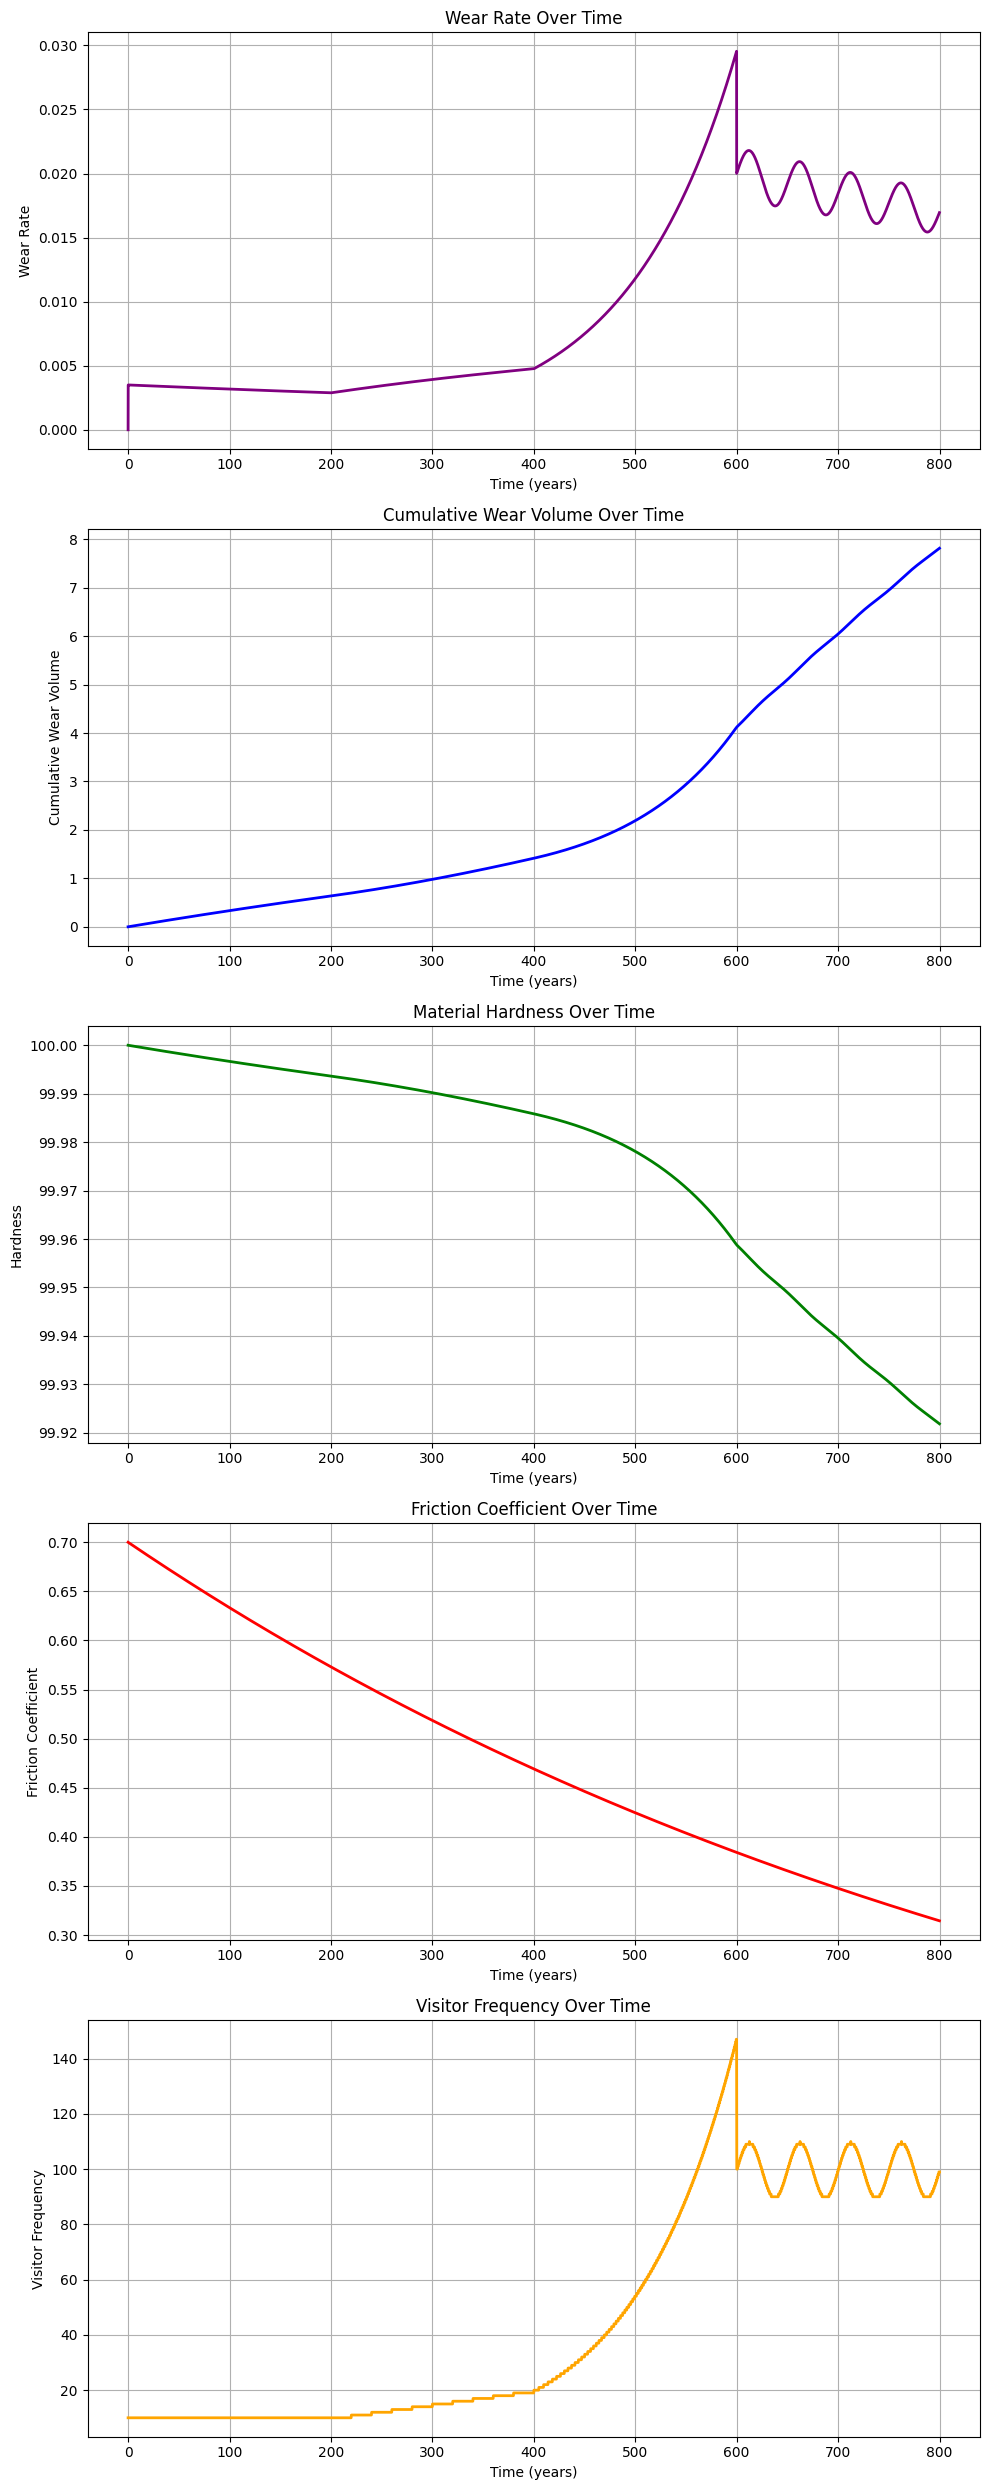

In [41]:
# 确保磨损系数逐年升高
K_t = lambda W: np.minimum(K_max, K0 * (1 + 0.01 * W))  # 调整增长速率

# 动态模拟，重新计算磨损速率和累积磨损
dW_dt_values = np.zeros(len(Time))  # 存储磨损速率变化
for i in range(1, len(Time)):
    t = Time[i]
    v = visitor_frequency(t)
    H = H_t(W[i - 1])
    mu = mu_t(t)
    K = K_t(W[i - 1])

    # 磨损速率计算
    dW_dt = K * mu * (F0 * v) / H
    dW_dt_values[i] = dW_dt  # 记录当前磨损速率

    # 更新磨损量
    W[i] = W[i - 1] + dW_dt * dt

# 可视化所有动态变化
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# 磨损速率随时间变化
axs[0].plot(Time, dW_dt_values, 'purple', linewidth=2)
axs[0].set_title('Wear Rate Over Time')
axs[0].set_xlabel('Time (years)')
axs[0].set_ylabel('Wear Rate')
axs[0].grid(True)

# 累积磨损量随时间变化
axs[1].plot(Time, W, 'blue', linewidth=2)
axs[1].set_title('Cumulative Wear Volume Over Time')
axs[1].set_xlabel('Time (years)')
axs[1].set_ylabel('Cumulative Wear Volume')
axs[1].grid(True)

# 硬度随时间变化
H_dynamic = H_t(W)
axs[2].plot(Time, H_dynamic, 'green', linewidth=2)
axs[2].set_title('Material Hardness Over Time')
axs[2].set_xlabel('Time (years)')
axs[2].set_ylabel('Hardness')
axs[2].grid(True)

# 摩擦系数随时间变化
mu_dynamic = mu_t(Time)
axs[3].plot(Time, mu_dynamic, 'red', linewidth=2)
axs[3].set_title('Friction Coefficient Over Time')
axs[3].set_xlabel('Time (years)')
axs[3].set_ylabel('Friction Coefficient')
axs[3].grid(True)

# 游客频率随时间变化
visitor_dynamic = v_t(Time)
axs[4].plot(Time, visitor_dynamic, 'orange', linewidth=2)
axs[4].set_title('Visitor Frequency Over Time')
axs[4].set_xlabel('Time (years)')
axs[4].set_ylabel('Visitor Frequency')
axs[4].grid(True)

plt.tight_layout()
plt.show()
